## Step 1: Prepare the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from joblib import dump, load

In [3]:
# Read the dataset
data = pd.read_csv('SalaryData.csv')

In [4]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [6]:
data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


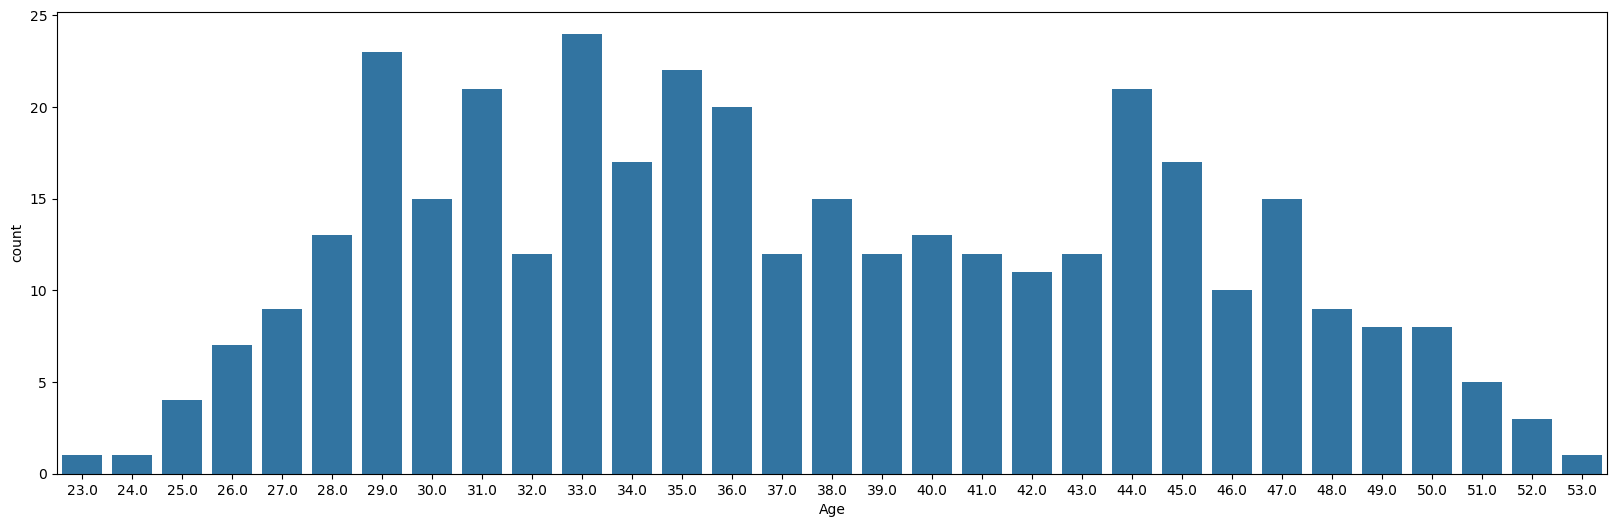

In [7]:
#the number of occurrences of every Age
plt.figure(figsize=(20, 6))
sns.countplot(data=data,x='Age')
plt.show()

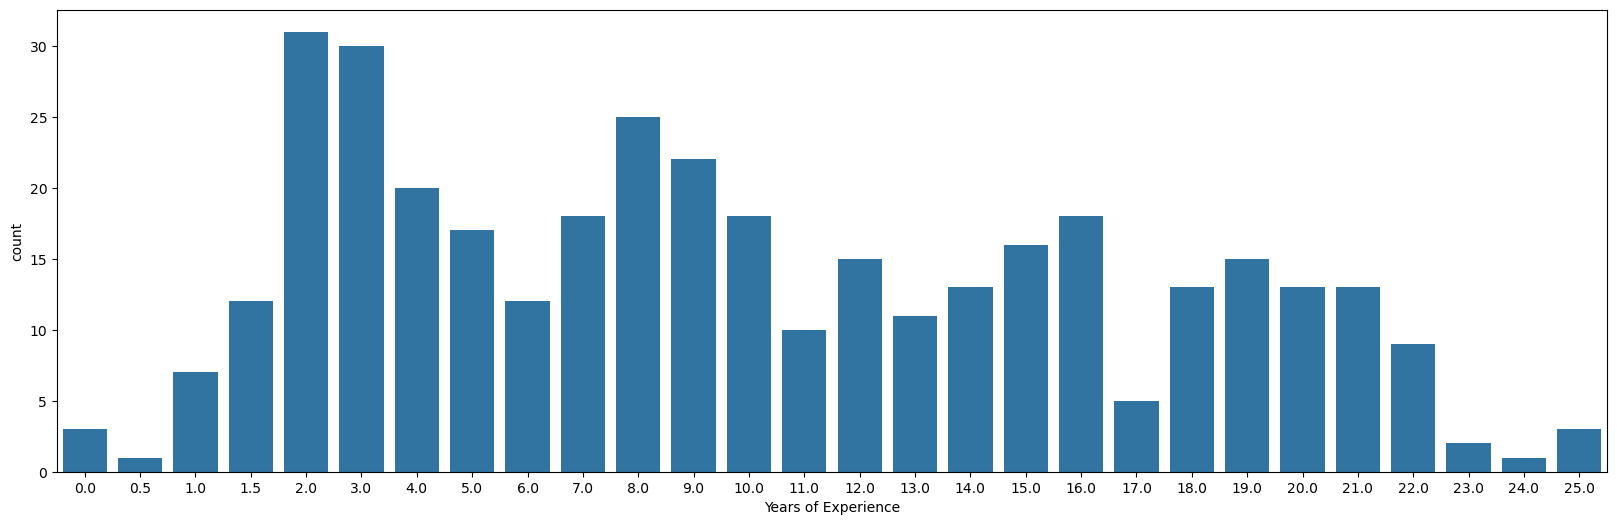

In [8]:
#the number of occurrences of every Years of Experience
plt.figure(figsize=(20, 6))
sns.countplot(data=data,x='Years of Experience')
plt.show()

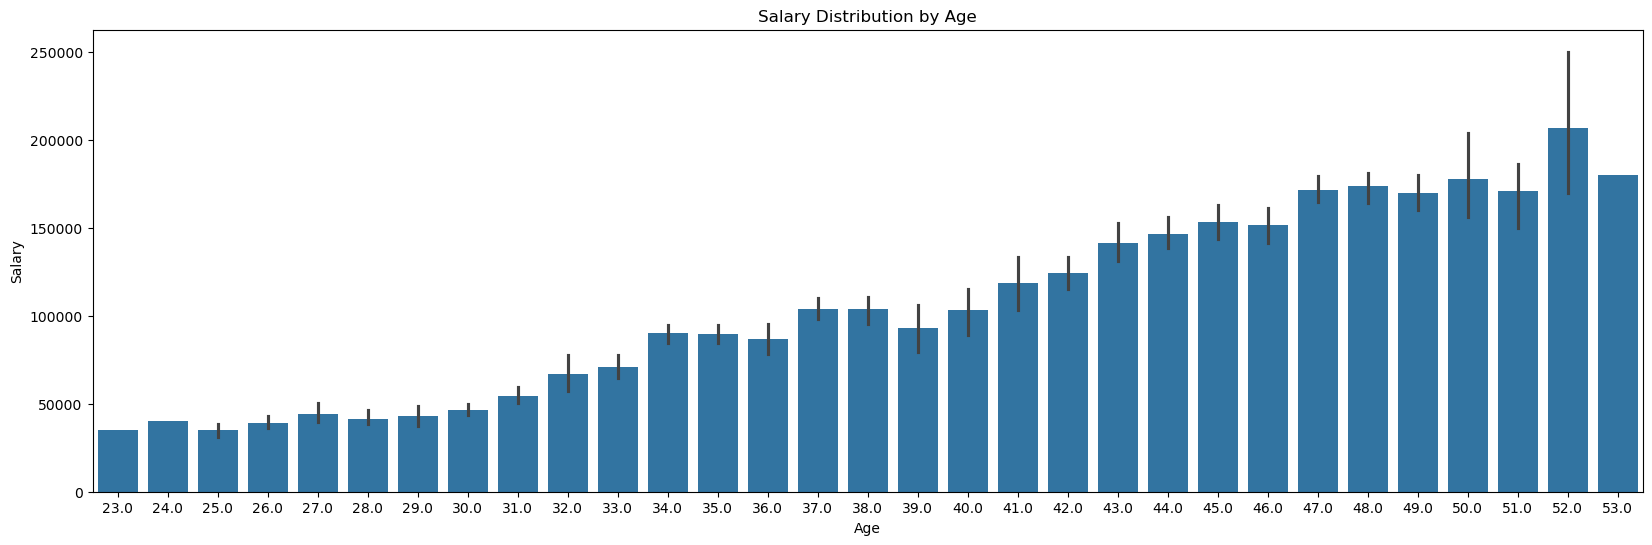

In [9]:
#average salary for particular age
plt.figure(figsize=(20, 6))

sns.barplot(x='Age', y='Salary', data=data)

plt.title('Salary Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

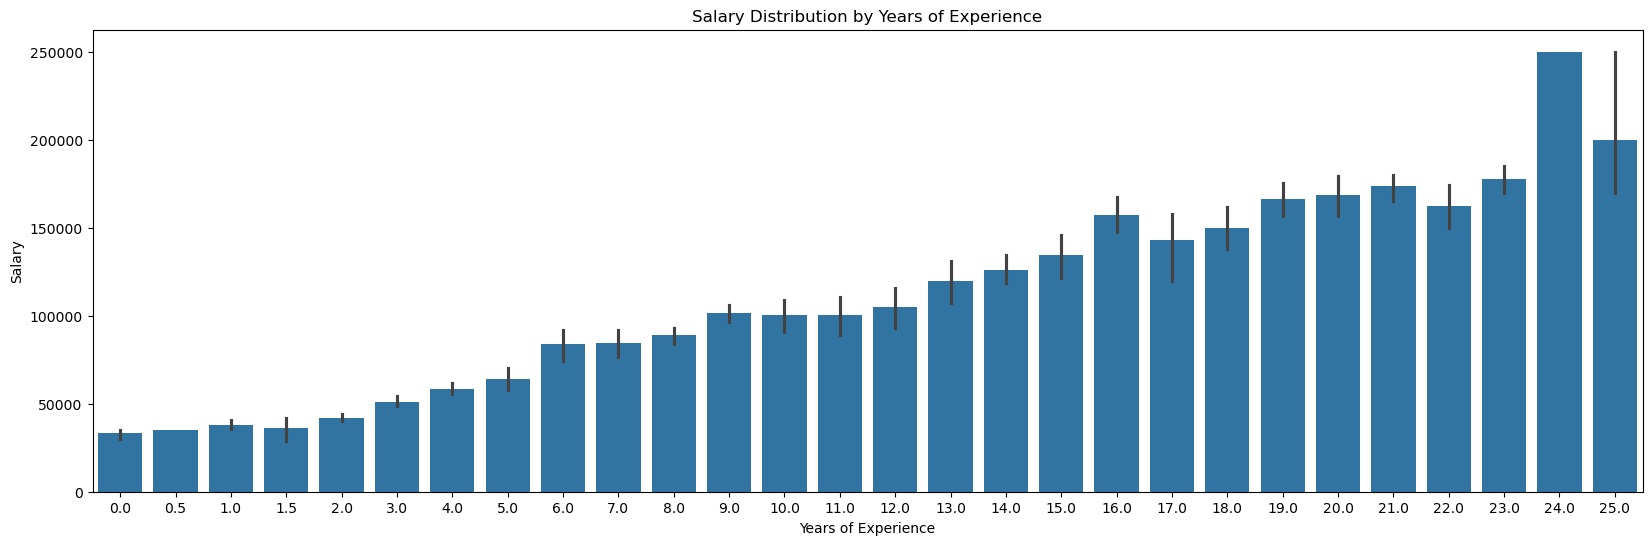

In [10]:
#average salary for particular year of experience
plt.figure(figsize=(20, 6))

sns.barplot(x='Years of Experience', y='Salary', data=data)

plt.title('Salary Distribution by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

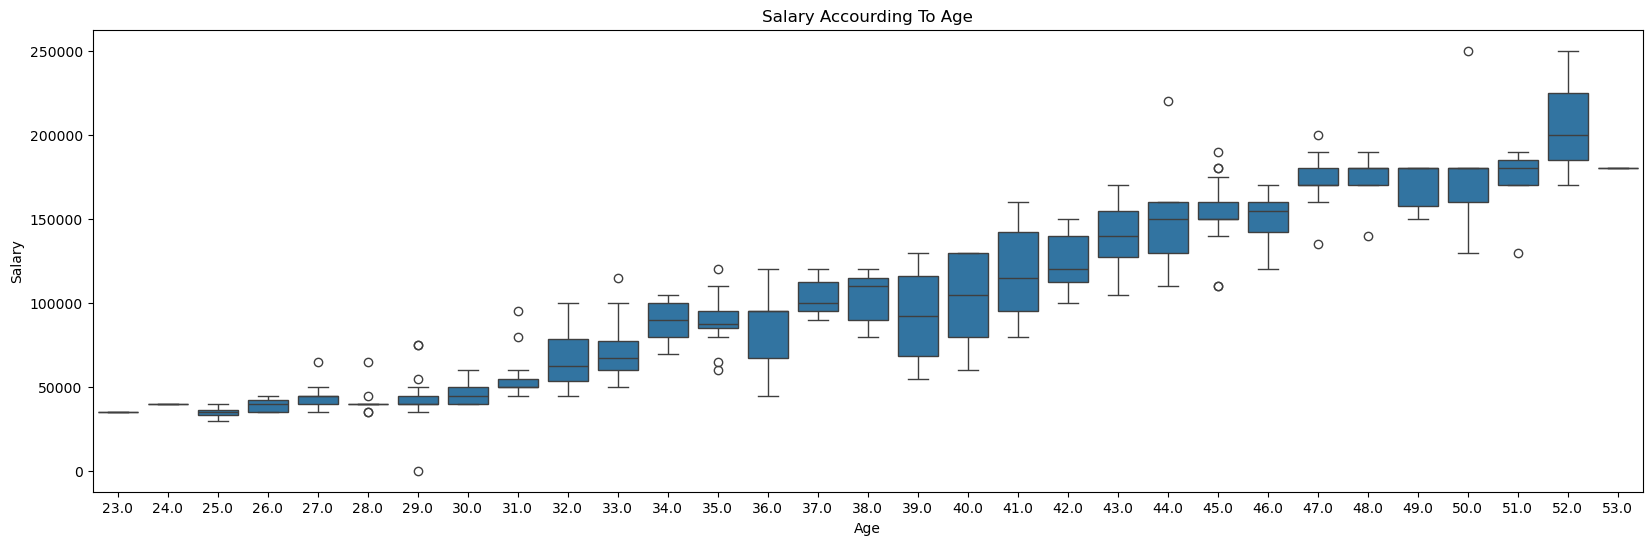

In [11]:
#displays the median (the central line inside the box) of the salary for each age group
plt.figure(figsize=(20, 6))

sns.boxplot(x='Age', y='Salary', data=data)

plt.title('Salary Accourding To Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

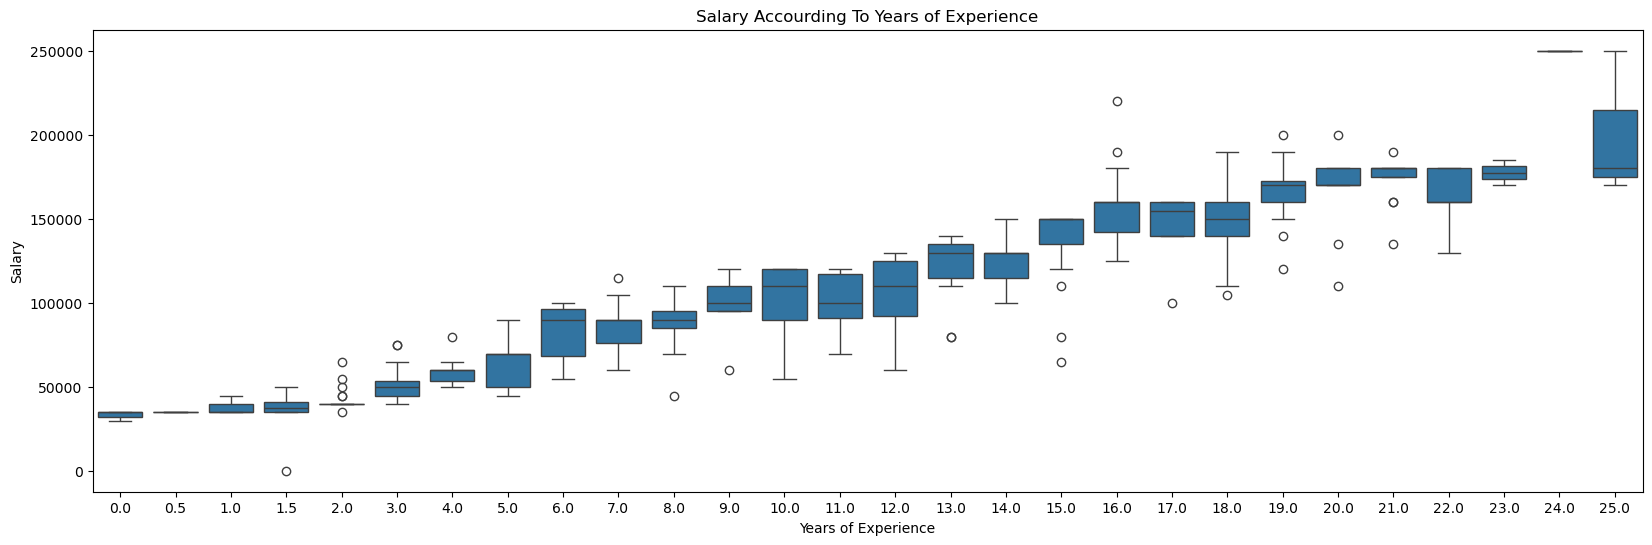

In [12]:
#displays the median (the central line inside the box) of the salary for each year of experience group
plt.figure(figsize=(20, 6))

sns.boxplot(x='Years of Experience', y='Salary', data=data)

plt.title('Salary Accourding To Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Data Preprocessing

In [14]:
# Impute missing numeric values (mean) and drop rows with missing categorical values
numeric_features = ['Age', 'Years of Experience']
categorical_features = ['Gender', 'Education Level', 'Job Title']

# Impute missing numeric values with mean
imputer = SimpleImputer(strategy='mean')
data[numeric_features] = imputer.fit_transform(data[numeric_features])

# Drop rows with missing categorical values (as the dataset is small)
data.dropna(subset=categorical_features, inplace=True)

# Drop rows where the target 'Salary' is missing
data.dropna(subset=['Salary'], inplace=True)
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [15]:
#drop salary in X, and put it as y
X = data.drop('Salary', axis=1)
y = data['Salary']
X

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,Male,Bachelor's,Software Engineer,5.0
1,28.0,Female,Master's,Data Analyst,3.0
2,45.0,Male,PhD,Senior Manager,15.0
3,36.0,Female,Bachelor's,Sales Associate,7.0
4,52.0,Male,Master's,Director,20.0
...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0
371,43.0,Male,Master's,Director of Operations,19.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0


In [16]:
#encoding categorical variables and standardizing numerical variables 
label_encoders = {}
scaler_columns={}    

# Encode categorical variables using Label Encoding
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# standardize numerical variable
for column in X.select_dtypes(include=['float64']).columns:
    scaler = StandardScaler()
    X[column] = scaler.fit_transform(X[[column]])
    scaler_columns[column] = scaler
X

,Age,Gender,Education Level,Job Title,Years of Experience
0,-0.769398,1,0,159,-0.768276
1,-1.336003,0,1,17,-1.073702
2,1.072068,1,2,130,0.758859
3,-0.202793,0,0,101,-0.462849
4,2.063627,1,1,22,1.522426
...,...,...,...,...,...
370,-0.344444,0,0,131,-0.310135
371,0.788766,1,1,30,1.369713
372,-1.194352,0,0,70,-1.226416
373,-0.486096,1,0,137,-0.462849


In [17]:
# Print the encoding mapping for each categorical column
count = 0
for column, le in label_encoders.items():
    count = 0
    print(f"Encoding for column: {column}")
    for idx, class_ in enumerate(le.classes_):
        # print(f"  {class_}: {idx}")
        count+=1
    print(f"Count for column: {count} \n")

Encoding for column: Gender
Count for column: 2 

Encoding for column: Education Level
Count for column: 3 

Encoding for column: Job Title
Count for column: 174 



## Random Forest

### Step 2 & 3 : Feature Extraction and Split the data (into training and testing set)

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)           #see all data shape (row, column), column needs to be same in train/test
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_test) #these data will be used to test the model
print(y_test)

(298, 5)
(298,)
(75, 5)
(75,)
          Age  Gender  Education Level  Job Title  Years of Experience
329  1.497022       1                1         29             1.675140
33   0.222161       0                0         84            -0.004708
15   0.930417       1                0         89             0.911572
316 -0.486096       0                1        117            -0.615562
57   0.788766       1                2        116             1.064286
..        ...     ...              ...        ...                  ...
94  -0.627747       1                0          3            -0.462849
196  0.505463       0                0        132             0.148005
313 -0.627747       1                0         49            -0.920989
294  1.072068       0                1        122             0.606145
349 -0.202793       1                0        111            -0.310135

[75 rows x 5 columns]
329    180000.0
33      65000.0
15     125000.0
316     80000.0
57     140000.0
         ...   

### Step 4: Fit model and predict outcomes [Code]

In [22]:
# Define the Random Forest model
rf = RandomForestRegressor()

#train model with training dataset
rf.fit(X_train, y_train)

#test using train data (to find overfitting)
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_train, y_pred_train)

# Calculate MAE as a percentage of the mean actual value
mae_percentage = (mae / y_test.mean()) * 100
print("Mean Absolute Error (MAE) Percentage:", mae_percentage, "%")

#find rmse of train model
mse = mean_squared_error(y_train, y_pred_train)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared
r2 = r2_score(y_train, y_pred_train)
print("R-squared (R2):", r2 * 100, "%")

Mean Absolute Error (MAE) Percentage: 2.9649953277761525 %
Root Mean Squared Error (RMSE): 5125.353941231619
R-squared (R2): 98.85807020857116 %


               Feature  Importance
0                  Age    0.580598
4  Years of Experience    0.262954
3            Job Title    0.124858
2      Education Level    0.027842
1               Gender    0.003747


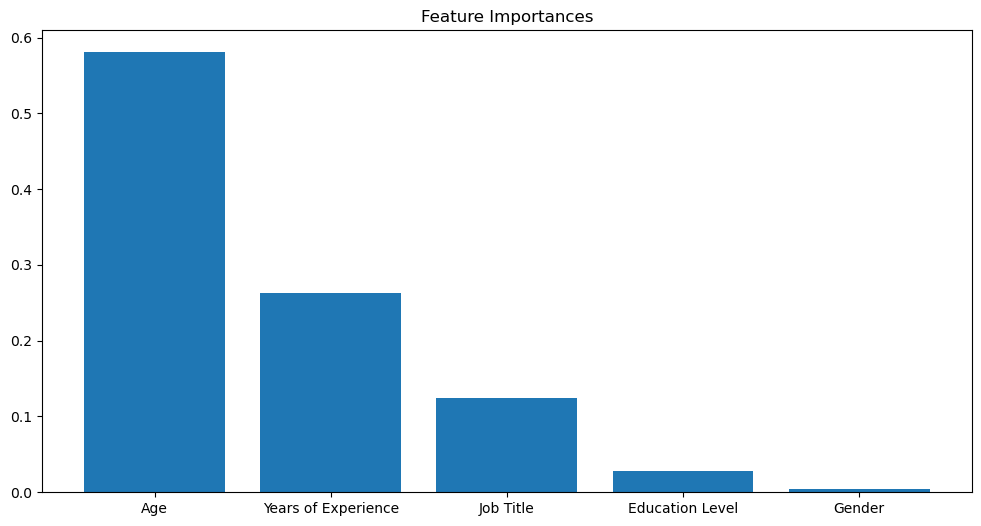

In [23]:
# Assuming 'X' is original DataFrame
feature_names = X.columns  # Store the column names before splitting

# Get feature importances from RandomForest model
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a DataFrame for easy plotting
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices])
plt.show()

#### perform fine-tuning

##### Search the best cv value

In [26]:
# List of possible `cv` values to test
cv_values = list(range(2, 20, 1))  

# Store the average scores for each `cv` value
cv_scores = {}

# Loop through each `cv` value to test
for cv in cv_values:
    # Perform cross-validation
    scores = cross_val_score(rf, X, y, cv=cv, scoring='neg_mean_squared_error')
    
    # Calculate the mean score (use negative MSE because cross_val_score minimizes loss)
    mean_score = np.mean(scores)
    
    # Store the average score for this `cv` value
    cv_scores[cv] = mean_score
    print(f'CV={cv}: Mean Score={mean_score:.4f}')

# Find the `cv` with the best score
best_cv = max(cv_scores, key=cv_scores.get)
print(f'Best `cv` value: {best_cv} with Mean Score: {cv_scores[best_cv]:.4f}')

CV=2: Mean Score=-360575383.3658
CV=3: Mean Score=-369723207.1029
CV=4: Mean Score=-327421594.2132
CV=5: Mean Score=-261648005.6129
CV=6: Mean Score=-229993592.4674
CV=7: Mean Score=-202910825.0604
CV=8: Mean Score=-227609643.2935
CV=9: Mean Score=-244535778.8229
CV=10: Mean Score=-192116263.4471
CV=11: Mean Score=-180774020.3084
CV=12: Mean Score=-181304512.1587
CV=13: Mean Score=-164297704.9300
CV=14: Mean Score=-152902556.2361
CV=15: Mean Score=-176387531.7916
CV=16: Mean Score=-184820320.4204
CV=17: Mean Score=-173913337.4139
CV=18: Mean Score=-171888627.0942
CV=19: Mean Score=-150741566.0893
Best `cv` value: 19 with Mean Score: -150741566.0893


##### After using cv value for training data

In [28]:
# Function to peek at 10 random results
def peek_results(y_actual, y_pred, num=10):
    print('Random sample of results:')
    selected = np.random.randint(0, len(y_actual), num)
    for i in selected:
        print(f'Actual: {y_actual.iloc[i]} | Predicted: {y_pred[i]}')
        
# Generate cross-validated predictions using cross_val_predict
y_pred_cv = cross_val_predict(rf, X_train, y_train, cv=14)

# Peek at the results using the peek_results function
peek_results(y_train, y_pred_cv)

# Calculate MAE as a percentage of the mean actual value
mae_percentage = (mae / y_test.mean()) * 100
print("Mean Absolute Error (MAE) Percentage:", mae_percentage, "%")

# Evaluate the model using Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(y_train, y_pred_cv)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared
r2 = r2_score(y_train, y_pred_cv)
print("R-squared (R2):", r2 * 100, "%")

Random sample of results:
Actual: 40000.0 | Predicted: 29778.5
Actual: 55000.0 | Predicted: 72550.0
Actual: 60000.0 | Predicted: 83900.0
Actual: 85000.0 | Predicted: 83400.0
Actual: 40000.0 | Predicted: 40000.0
Actual: 130000.0 | Predicted: 100250.0
Actual: 40000.0 | Predicted: 29778.5
Actual: 90000.0 | Predicted: 89550.0
Actual: 180000.0 | Predicted: 174250.0
Actual: 110000.0 | Predicted: 107050.0
Mean Absolute Error (MAE) Percentage: 2.9649953277761525 %
Root Mean Squared Error (RMSE): 13346.675473443198
R-squared (R2): 92.25648968930476 %


##### Search the best random state

In [30]:
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Set the range of random states to test
random_states = range(1, 101)  # Example range from 1 to 100

# Store RMSE results for each random state
rmse_results = []
r2_results = []
mae_results = []
adjusted_r2_results = []
mape_results = []
medae_results = []

for state in random_states:
    # Split the data with the current random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)

    # Initialize and train the model
    rf = RandomForestRegressor(
        random_state=state
    )
    rf.fit(X_train, y_train)

    # Predict on the test set
    y_pred_train = rf.predict(X_train)
    
    # Calculate MAE for the current random state
    mae = mean_absolute_error(y_train, y_pred_train)
    mae_results.append((state, mae))

    # Calculate RMSE for the current random state
    rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_results.append((state, rmse))

    # Calculate R² for the current random state
    r2 = r2_score(y_train, y_pred_train)
    r2_results.append((state, r2))

# Find the random state with the lowest MAE
best_state = min(mae_results, key=lambda x: x[1])
print(f"Best random_state: {best_state[0]} with MAE: {best_state[1]:.2f}")

# Find the random state with the lowest RMSE
best_state = min(rmse_results, key=lambda x: x[1])
print(f"Best random_state: {best_state[0]} with RMSE: {best_state[1]}")

# Find the random state with the highest R-squared
best_state = max(r2_results, key=lambda x: x[1])
print(f"Best random_state: {best_state[0]} with R-squared: {best_state[1] * 100:.2f}%")

Best random_state: 41 with MAE: 2742.03
Best random_state: 60 with RMSE: 4392.906190206057
Best random_state: 60 with R-squared: 99.17%


##### Search the best parameter grid

In [32]:
# Define the parameter grid
param_grid = {
    'n_estimators': list(range(100, 500, 100)),  # Number of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples at a leaf node
    'max_depth': [None] + list(range(10, 100, 5)),  # Depth of trees
    'max_features': list(range(1, 50, 5)),  # Range from 1 to 50 with increment of 5
}

# param_grid = {
#     'n_estimators': [400],  # Number of trees
#     'min_samples_split': [2],  # Minimum samples to split a node
#     'min_samples_leaf': [1],    # Minimum samples at a leaf node
#     'max_depth': [10],  # Depth of trees
#     'max_features': [1],  # Range from 1 to 50 with increment of 5
# }

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=60)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=14, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Perform the grid search
print('Performing grid search...', end='')
grid_search.fit(X_train, y_train)
print('done')

# Output the best parameters
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

# Retrain the model using the best parameters
best_forest_model = RandomForestRegressor(**best_params, random_state=13)
best_forest_model.fit(X_train, y_train)

# Predict on the test set using the tuned model
y_pred_best = best_forest_model.predict(X_test)

Performing grid search...Fitting 14 folds for each of 6840 candidates, totalling 95760 fits
done
Best parameters found: {'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


In [33]:
# Predict on the test set using the best model from GridSearchCV
y_pred_best = best_forest_model.predict(X_train)

# Calculate R-squared (R²) for the best model
r2_best = r2_score(y_train, y_pred_best)
print("R-squared of the best model:", r2_best * 100, "%")

R-squared of the best model: 98.72409498492793 %


### Step 5: Evaluate the model [Code]

#### show prediction for test result before fine-tune

In [36]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate MAE as a percentage of the mean actual value
mae_percentage = (mae / y_test.mean()) * 100
print("Mean Absolute Error (MAE) Percentage:", mae_percentage, "%")

# Evaluate the model using Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2 * 100, "%")

Mean Absolute Error (MAE) Percentage: 50.87223066666666 %
Root Mean Squared Error (RMSE): 63263.234901870135
R-squared (R2): -83.2526048648901 %


#### after fine-tune

In [38]:
# Predict the target on the testing set
y_pred_test = best_forest_model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_test)

# Calculate MAE as a percentage of the mean actual value
mae_percentage = (mae / y_test.mean()) * 100
print("Mean Absolute Error (MAE) Percentage:", mae_percentage, "%")

# Evaluate the model using Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred_test)
print("R-squared (R2):", r2 * 100, "%")

Mean Absolute Error (MAE) Percentage: 6.697962898915797 %
Root Mean Squared Error (RMSE): 10122.741429633526
R-squared (R2): 95.30815503428485 %


#### Comparison

In [40]:
# Results before fine-tuning
mae_before = mean_absolute_error(y_test, y_pred)
mae_percentage_before = (mae_before / y_test.mean()) * 100
mse_before = mean_squared_error(y_test, y_pred)
rmse_before = mse_before ** 0.5
r2_before = r2_score(y_test, y_pred) * 100

# Results after fine-tuning
mae_after_rf = mean_absolute_error(y_test, y_pred_test)
mae_percentage_after_rf = (mae_after_rf / y_test.mean()) * 100
mse_after_rf = mean_squared_error(y_test, y_pred_test)
rmse_after_rf = mse_after_rf ** 0.5
r2_after_rf = r2_score(y_test, y_pred_test) * 100

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'MAE Percentage', 'Root Mean Squared Error (RMSE)', 'R-squared (R2)'],
    'Before Fine-Tuning': [mae_before, mae_percentage_before, rmse_before, r2_before],
    'After Fine-Tuning': [mae_after_rf, mae_percentage_after_rf, rmse_after_rf, r2_after_rf]
})

# Display the DataFrame
print(results.to_string(index=False))


                        Metric  Before Fine-Tuning  After Fine-Tuning
     Mean Absolute Error (MAE)        50872.230667        6697.962899
                MAE Percentage           50.872231           6.697963
Root Mean Squared Error (RMSE)        63263.234902       10122.741430
                R-squared (R2)          -83.252605          95.308155


### Step 6: Predict unseen data

In [42]:
# Sample test data

test_data = {
    'Age': [28],  # Age values
    'Gender': ['Female'],  # Gender values
    'Education Level': ['Master\'s'],  # Education levels
    'Job Title': ['Data Analyst'],  # Job titles
    'Years of Experience': [3]  # Years of experience
}

# Convert to DataFrame
test_df = pd.DataFrame(test_data)

# Preprocess unseen data
for column, le in label_encoders.items():
    if column in test_df.columns:
        test_df[column] = le.transform(test_df[column])
        # print(test_df[column])

for column, scaler in scaler_columns.items():
    # Ensure the column exists in the unseen data
    if column in test_df.columns:
        # Apply the scaler and update the column
        test_df[[column]] = scaler.transform(test_df[[column]])
        # print(test_df[column])

# Ensure all columns are present and in the correct order
test_df = test_df[X.columns]

# Predict the salary_in_usd for new unseen data
predicted_salary = best_forest_model.predict(test_df)

print(f"Predicted salary for unseen data: {predicted_salary[0]:.2f}")

Predicted salary for unseen data: 60087.34


### Step 7 Store the model in Joblib

In [44]:
dump(best_forest_model, 'best_forest_model.joblib')

['best_forest_model.joblib']

In [45]:
# Load the model
# test_best_forest_model = load('best_forest_model.joblib')

In [46]:
# # Sample user input
# age = float(input("Enter Age: "))
# gender = input("Enter Gender (Male/Female): ")
# education_level = input("Enter Education Level (e.g., Bachelor's, Master's, etc.): ")
# job_title = input("Enter Job Title (e.g., Data Scientist, Data Engineer, etc.): ")
# years_of_experience = float(input("Enter Years of Experience: "))

# # Create a dictionary to represent the user input
# entered_data = {
#     'Age': [age],
#     'Gender': [gender],
#     'Education Level': [education_level],
#     'Job Title': [job_title],
#     'Years of Experience': [years_of_experience]
# }

# test_entered_data = pd.DataFrame(entered_data)

# test_label_encoders = {}

# for column in test_entered_data.select_dtypes(include=['object']).columns:
#     le = LabelEncoder()
#     test_entered_data[column] = le.fit_transform(test_entered_data[column])
#     test_label_encoders[column] = le

# # Initialize StandardScaler for numerical features
# test_scaler = StandardScaler()

# # Scale numerical variables
# for column in test_entered_data.select_dtypes(include=['float64']).columns:
#     test_entered_data[column] = scaler.fit_transform(test_entered_data[[column]])


# # Assuming 'rf' is your trained RandomForestRegressor model
# test_y_pred_test = test_best_forest_model.predict(test_entered_data)
# print("\nPredicted Salary:", round(test_y_pred_test[0], 2))

## Decision Tree

### Step 2 & 3 : Feature Extraction and Split the data (into training and testing set)

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)           #see all data shape (row, column), column needs to be same in train/test
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(298, 5)
(298,)
(75, 5)
(75,)


### Step 4: Fit model and predict outcomes [Code]

#### Get feature importances

               Feature  Importance
0                  Age    0.721930
4  Years of Experience    0.170569
3            Job Title    0.073636
2      Education Level    0.030962
1               Gender    0.002903


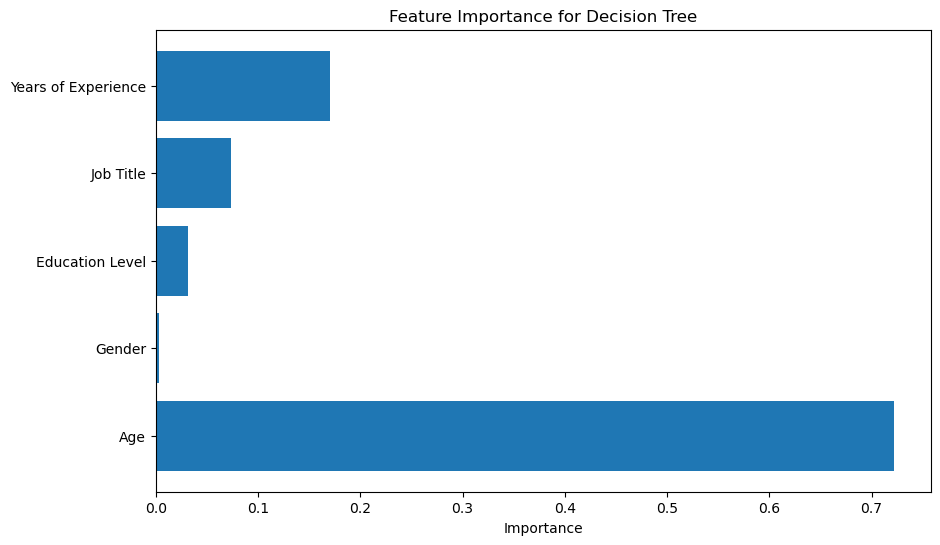

In [52]:
# Define the Decision Tree model
decisiontree = DecisionTreeRegressor(random_state=42)

# Fit the model
decisiontree.fit(X_train, y_train)

# Get feature importances
importances = decisiontree.feature_importances_

# Create a DataFrame for easy plotting
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance for Decision Tree")
plt.show()

#### Train Model

In [54]:
# Define the Decision Tree model
decisiontree = DecisionTreeRegressor(random_state=42)

#train model with training dataset
decisiontree.fit(X_train, y_train)

#test using train data (to find overfitting)
y_pred_train_tree = decisiontree.predict(X_train)

#find rmse of train model
mse = mean_squared_error(y_train, y_pred_train_tree)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared
r2 = r2_score(y_train, y_pred_train_tree)
print("R-squared (R2):", r2 * 100, "%")

Root Mean Squared Error (RMSE): 1419.3193022992375
R-squared (R2): 99.91243069602965 %


#### Show Random Prediction Result

In [56]:
# Function to peek at 10 random results
def peek_results(y_actual, y_pred, num=10):
    print('Random sample of results:')
    selected = np.random.randint(0, len(y_actual), num)
    for i in selected:
        print(f'Actual: {y_actual.iloc[i]} | Predicted: {y_pred[i]}')

# Generate cross-validated predictions using cross_val_predict
y_pred_cv_tree = cross_val_predict(decisiontree, X_train, y_train, cv=5)

# Peek at the results using the peek_results function
peek_results(y_train, y_pred_cv_tree)

Random sample of results:
Actual: 70000.0 | Predicted: 60000.0
Actual: 40000.0 | Predicted: 45000.0
Actual: 50000.0 | Predicted: 55000.0
Actual: 40000.0 | Predicted: 40000.0
Actual: 170000.0 | Predicted: 170000.0
Actual: 80000.0 | Predicted: 85000.0
Actual: 150000.0 | Predicted: 150000.0
Actual: 45000.0 | Predicted: 55000.0
Actual: 160000.0 | Predicted: 160000.0
Actual: 95000.0 | Predicted: 90000.0


#### Perform Fine-Tuning

In [58]:
# Perform parameter grid
param_grid = {
    'max_depth': [None] + list(range(5, 30, 5)),          # Depth of the tree (None for no limit or a range of values)
    'min_samples_split': list(range(2, 20, 2)),              # Minimum number of samples to split a node
    'min_samples_leaf': list(range(1, 10, 2)),                  # Minimum number of samples required in a leaf
    'criterion': ['squared_error', 'absolute_error'],             # Criterion for measuring the quality of a split
    'max_features': [None, 'sqrt', 'log2'],                       # Number of features to consider when looking for the best split
    'min_weight_fraction_leaf': [0.0, 0.01]          # Fraction of the total weight of samples required to be at a leaf node
}

# param_grid = {
#     'max_depth': [None],          # Depth of the tree (None for no limit or a range of values)
#     'min_samples_split': [10],              # Minimum number of samples to split a node
#     'min_samples_leaf': [1],                  # Minimum number of samples required in a leaf
#     'criterion': ['squared_error'],             # Criterion for measuring the quality of a split
#     'max_features': [None],                       # Number of features to consider when looking for the best split
#     'min_weight_fraction_leaf': [0.0]
# }

# Initialize GridSearchCV with DecisionTreeRegressor
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Perform the grid search
print("Performing grid search... Please wait.")
grid_search.fit(X_train, y_train)

# Check if any parameters were tuned
if grid_search.best_params_:
    print("\nGrid Search Complete!")
    print(f"Best parameters found: {grid_search.best_params_}")
else:
    print("\nNo hyperparameters were tuned. Using default parameters.")

# Output RMSE of the best model
best_rmse = np.sqrt(-grid_search.best_score_)
print(f"\nRMSE of the best model from Grid Search: {best_rmse:.4f}")

# Use the best model found by GridSearchCV
best_tree_model = grid_search.best_estimator_

# Predict on the training set using the best model
y_pred_train = best_tree_model.predict(X_train)

# Calculate R-squared (R²) for the best model on the training set
r2_best_train = r2_score(y_train, y_pred_train)

# Display the R-squared score
print(f"Best Model Training R-squared: {r2_best_train * 100:.2f}%")


Performing grid search... Please wait.
Fitting 5 folds for each of 3240 candidates, totalling 16200 fits

Grid Search Complete!
Best parameters found: {'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0}

RMSE of the best model from Grid Search: 16246.5327
Best Model Training R-squared: 96.61%


### Step 5: Evaluate the model [Code]

#### using fine-tuned model to predict test data

In [61]:
# Predict the target on the testing set
y_pred_test = best_tree_model.predict(X_test)

# Evaluate the model using Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)
rmse = mse ** 0.5

# Calculate R-squared
r2 = r2_score(y_test, y_pred_test)
print(f"Model Evaluation Results on Test Set:")
print(f"{'-'*40}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r2 * 100:.2f}%")
print(f"{'-'*40}")

Model Evaluation Results on Test Set:
----------------------------------------
Root Mean Squared Error (RMSE): 14471.9172
R-squared: 91.26%
----------------------------------------


In [62]:
# Results before fine-tuning
mae_before = mean_absolute_error(y_test, y_pred)
mae_percentage_before = (mae_before / y_test.mean()) * 100
mse_before = mean_squared_error(y_test, y_pred)
rmse_before = mse_before ** 0.5
r2_before = r2_score(y_test, y_pred) * 100

# Results after fine-tuning
mae_after_dt = mean_absolute_error(y_test, y_pred_test)
mae_percentage_after_dt = (mae_after_dt / y_test.mean()) * 100
mse_after_dt = mean_squared_error(y_test, y_pred_test)
rmse_after_dt = mse_after_dt ** 0.5
r2_after_dt = r2_score(y_test, y_pred_test) * 100

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'MAE Percentage', 'Root Mean Squared Error (RMSE)', 'R-squared (R2)'],
    'Before Fine-Tuning': [mae_before, mae_percentage_before, rmse_before, r2_before],
    'After Fine-Tuning': [mae_after_dt, mae_percentage_after_dt, rmse_after_dt, r2_after_dt]
})

# Display the DataFrame
print(results.to_string(index=False))

                        Metric  Before Fine-Tuning  After Fine-Tuning
     Mean Absolute Error (MAE)         8489.564000        9993.412698
                MAE Percentage            8.285196           9.752843
Root Mean Squared Error (RMSE)        11943.870824       14471.917234
                R-squared (R2)           94.050004          91.264684


### Step 6: Predict unseen data

In [64]:
# Sample test data
test_data = {
    'Age': [25],                            # Age values
    'Gender': ['Female'],                   # Gender values
    'Education Level': ["Bachelor's"],      # Education levels
    'Job Title': ['Data Analyst'],          # Job titles
    'Years of Experience': [1]              # Years of experience
}

# Convert to DataFrame
test_df = pd.DataFrame(test_data)

# Preprocess unseen data
print("Preprocessing unseen data for prediction...\n")

# Label encode categorical variables
for column, le in label_encoders.items():
    if column in test_df.columns:
        test_df[column] = le.transform(test_df[column])
        print(f"Encoded {column}: {test_data[column][0]} -> {test_df[column][0]}")

# Standardize numerical variables
for column, scaler in scaler_columns.items():
    if column in test_df.columns:
        test_df[[column]] = scaler.transform(test_df[[column]])
        print(f"Standardized {column}: {test_df[column][0]}")

# Ensure all columns are present and in the correct order
test_df = test_df[X.columns]

# Predict the salary for the unseen data
predicted_salary = best_tree_model.predict(test_df)

# Display the prediction result
print("\nPrediction complete!")
print(f"Predicted Salary for the test data: ${predicted_salary[0]:,.2f}")


Preprocessing unseen data for prediction...

Encoded Gender: Female -> 0
Encoded Education Level: Bachelor's -> 0
Encoded Job Title: Data Analyst -> 17
Standardized Age: -1.7609569840409987
Standardized Years of Experience: -1.3791293769321766

Prediction complete!
Predicted Salary for the test data: $38,125.00


### Step 7 Store the model in Joblib

In [66]:
dump(best_tree_model, 'decision_tree_model.joblib')

['decision_tree_model.joblib']

In [67]:
# Load the model
# test_best_tree_model = load('decision_tree_model.joblib')

In [68]:
# # Sample user input
# age = float(input("Enter Age: "))
# gender = input("Enter Gender (Male/Female): ")
# education_level = input("Enter Education Level (e.g., Bachelor's, Master's, etc.): ")
# job_title = input("Enter Job Title (e.g., Data Scientist, Data Engineer, etc.): ")
# years_of_experience = float(input("Enter Years of Experience: "))

# # Create a dictionary to represent the user input
# entered_data = {
#     'Age': [age],
#     'Gender': [gender],
#     'Education Level': [education_level],
#     'Job Title': [job_title],
#     'Years of Experience': [years_of_experience]
# }

# test_entered_data = pd.DataFrame(entered_data)

# test_label_encoders = {}

# for column in test_entered_data.select_dtypes(include=['object']).columns:
#     le = LabelEncoder()
#     test_entered_data[column] = le.fit_transform(test_entered_data[column])
#     test_label_encoders[column] = le

# # Initialize StandardScaler for numerical features
# test_scaler = StandardScaler()

# # Scale numerical variables
# for column in test_entered_data.select_dtypes(include=['float64']).columns:
#     test_entered_data[column] = scaler.fit_transform(test_entered_data[[column]])


# test_y_pred_test = test_best_tree_model.predict(test_entered_data)
# print("\nPredicted Salary:", round(test_y_pred_test[0], 2))

## KNN

### Step 2 & 3 : Feature Extraction and Split the data (into training and testing set)

In [71]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Fit model and predict outcomes [Code]

In [4]:
# Initialize and train the KNN model with default parameters
knn_default = KNeighborsRegressor()
knn_default.fit(X_train, y_train)

NameError: name 'KNeighborsRegressor' is not defined

In [74]:
# Predict on the test set
y_pred_default = knn_default.predict(X_test)

#### Predict data example

In [76]:
# Predict on a new data example
new_data = pd.DataFrame([[28, 'Female', "Master's", 3, 'Data Analyst']],
                        columns=['Age', 'Gender', 'Education Level', 'Years of Experience', 'Job Title'])

# Preprocess unseen data
for column, le in label_encoders.items():
    if column in new_data.columns:
        new_data[column] = le.transform(new_data[column])
        # print(new_data[column])

for column, scaler in scaler_columns.items():
    # Ensure the column exists in the unseen data
    if column in new_data.columns:
        # Apply the scaler and update the column
        new_data[[column]] = scaler.transform(new_data[[column]])
        # print(new_data[column])

# Ensure all columns are present and in the correct order
new_data = new_data[X.columns]

# Predict using the default model
predicted_salary_default = knn_default.predict(new_data)
print(f"Predicted Salary for new data using the default model: {predicted_salary[0]:.2f}")

Predicted Salary for new data using the default model: 38125.00


#### Fine-Tuning

In [78]:
# 2. Fine-Tune the KNN Model Using GridSearchCV
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],  # Different values of n_neighbors to test
    'weights': ['uniform', 'distance'],   # Use uniform or distance-based weights
    'metric': ['euclidean', 'manhattan']  # Different distance metrics
}

# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Output the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


### Step 5: Evaluate the model [Code]

#### Evaluate model before fine-tuning

In [81]:
# Evaluate the model before fine-tuning
r2_default = r2_score(y_test, y_pred_default) * 100
mae_default = mean_absolute_error(y_test, y_pred_default)
mse_default = mean_squared_error(y_test, y_pred_default)

print("Before Fine-Tuning:")
print(f"Default Model R-squared: {r2_default}%")
print(f"Default Model Mean Absolute Error: {mae_default}")
print(f"Default Model Mean Squared Error: {mse_default}")

Before Fine-Tuning:
Default Model R-squared: 71.87595379419267%
Default Model Mean Absolute Error: 15840.933333333332
Default Model Mean Squared Error: 674297132.0


#### after fine-tune

In [83]:
# Predict on the test set using the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

# Calculate R-squared (R²) for the best model
r2_best = r2_score(y_test, y_pred_test) * 100
mae_best = mean_absolute_error(y_test, y_pred_test)
mse_best = mean_squared_error(y_test, y_pred_test)

print(f"Best Model R-squared: {r2_best}%")
print(f"Best Model Mean Absolute Error: {mae_best}")
print(f"Best Model Mean Squared Error: {mse_best}")

Best Model R-squared: 86.26066585157726%
Best Model Mean Absolute Error: 11685.925622232546
Best Model Mean Squared Error: 329411832.99429053


#### Comparison

In [85]:
# Results before fine-tuning
mae_before = mean_absolute_error(y_test, y_pred)
mae_percentage_before = (mae_before / y_test.mean()) * 100
mse_before = mean_squared_error(y_test, y_pred)
rmse_before = mse_before ** 0.5
r2_before = r2_score(y_test, y_pred) * 100

# Results after fine-tuning
mae_after_knn = mean_absolute_error(y_test, y_pred_test)
mae_percentage_after_knn = (mae_after_knn / y_test.mean()) * 100
mse_after_knn = mean_squared_error(y_test, y_pred_test)
rmse_after_knn = mse_after_knn ** 0.5
r2_after_knn = r2_score(y_test, y_pred_test) * 100

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'MAE Percentage', 'Root Mean Squared Error (RMSE)', 'R-squared (R2)'],
    'Before Fine-Tuning': [mae_before, mae_percentage_before, rmse_before, r2_before],
    'After Fine-Tuning': [mae_after_knn, mae_percentage_after_knn, rmse_after_knn, r2_after_knn]
})

# Display the DataFrame
print(results.to_string(index=False))

                        Metric  Before Fine-Tuning  After Fine-Tuning
     Mean Absolute Error (MAE)         8489.564000       11685.925622
                MAE Percentage            8.285196          11.404612
Root Mean Squared Error (RMSE)        11943.870824       18149.706141
                R-squared (R2)           94.050004          86.260666


### Step 6: Predict unseen data

In [87]:
# Sample test data

test_data = {
    'Age': [28],  # Age values
    'Gender': ['Female'],  # Gender values
    'Education Level': ['Master\'s'],  # Education levels
    'Job Title': ['Data Analyst'],  # Job titles
    'Years of Experience': [3]  # Years of experience
}

# Convert to DataFrame
test_df = pd.DataFrame(test_data)

# Preprocess unseen data
for column, le in label_encoders.items():
    if column in test_df.columns:
        test_df[column] = le.transform(test_df[column])
        # print(test_df[column])

for column, scaler in scaler_columns.items():
    # Ensure the column exists in the unseen data
    if column in test_df.columns:
        # Apply the scaler and update the column
        test_df[[column]] = scaler.transform(test_df[[column]])
        # print(test_df[column])

# Ensure all columns are present and in the correct order
test_df = test_df[X.columns]

# Predict the salary_in_usd for new unseen data
predicted_salary = best_model.predict(test_df)

print(f"Predicted salary for unseen data: {predicted_salary[0]:.2f}")

Predicted salary for unseen data: 65000.00


### Step 7 Store the model in Joblib

In [89]:
dump(best_model, 'knn.joblib')

['knn.joblib']

In [90]:
# Load the model
# test_best_model = load('knn.joblib')

In [91]:
# # Sample user input
# age = float(input("Enter Age: "))
# gender = input("Enter Gender (Male/Female): ")
# education_level = input("Enter Education Level (e.g., Bachelor's, Master's, etc.): ")
# job_title = input("Enter Job Title (e.g., Data Scientist, Data Engineer, etc.): ")
# years_of_experience = float(input("Enter Years of Experience: "))

# # Create a dictionary to represent the user input
# entered_data = {
#     'Age': [age],
#     'Gender': [gender],
#     'Education Level': [education_level],
#     'Job Title': [job_title],
#     'Years of Experience': [years_of_experience]
# }

# test_entered_data = pd.DataFrame(entered_data)

# test_label_encoders = {}

# for column in test_entered_data.select_dtypes(include=['object']).columns:
#     le = LabelEncoder()
#     test_entered_data[column] = le.fit_transform(test_entered_data[column])
#     test_label_encoders[column] = le

# # Initialize StandardScaler for numerical features
# test_scaler = StandardScaler()

# # Scale numerical variables
# for column in test_entered_data.select_dtypes(include=['float64']).columns:
#     test_entered_data[column] = scaler.fit_transform(test_entered_data[[column]])


# test_y_pred_test = best_model.predict(test_entered_data)
# print("\nPredicted Salary:", round(test_y_pred_test[0], 2))

## Analysis the result between 3 model

In [93]:
models = {
    'Random Forest': best_forest_model,
    'Decision Tree': best_tree_model,
    'KNN': best_model
}

In [94]:
results = {'Model': [], 'R-Mean Absolute Error (MAE)': [], 'MAE Percentage': [], 'Root Mean Squared Error (RMSE)': [], 'R-squared (R2)': []}

for i in models:
    obj = models[i]
    obj.fit(X_train, y_train)
    obj_pred = obj.predict(X_test)

    results = pd.DataFrame({
        'Model': ['Random Forest', 'Decision Tree', 'KNN'],
        'R-Mean Absolute Error (MAE)': [mae_after_rf, mae_after_dt, mae_after_knn],
        'MAE Percentage': [mae_percentage_after_rf, mae_percentage_after_dt, mae_percentage_after_knn],
        'Root Mean Squared Error (RMSE)': [rmse_after_rf, rmse_after_dt, rmse_after_knn],
        'R-squared (R2)': [r2_after_rf, r2_after_dt, r2_after_knn]
    })

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the DataFrame without row numbering (index)
print(results_df.to_string(index=False))

        Model  R-Mean Absolute Error (MAE)  MAE Percentage  Root Mean Squared Error (RMSE)  R-squared (R2)
Random Forest                  6697.962899        6.697963                    10122.741430       95.308155
Decision Tree                  9993.412698        9.752843                    14471.917234       91.264684
          KNN                 11685.925622       11.404612                    18149.706141       86.260666
